In [215]:
import numpy as np
import pandas as pd
from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt

In [216]:
## Using multithreads
from multiprocessing import Pool

##### Randomly Generate trainning sets and testing sets which are both two clusters of points

In [217]:
r_A = (2, 2)
r_B = (-2, -2)
cov = np.array([[1., 0], [0., 1.7]])

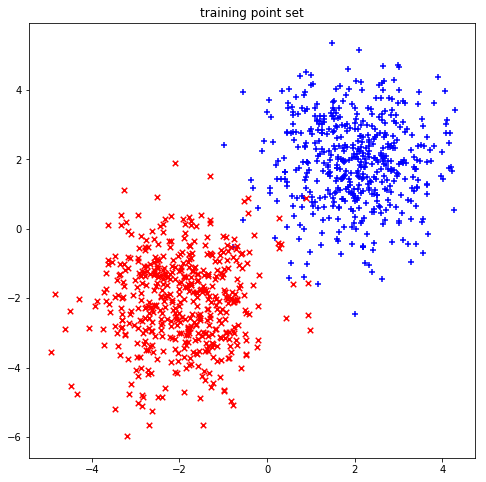

In [218]:
## Generating training set
N_train = 500
r_plus = np.random.multivariate_normal(r_A, cov, N_train)
y_plus = np.array([1]*N_train)
r_minus = np.random.multivariate_normal(r_B, cov, N_train)
y_minus = np.array([-1]*N_train)
train_x = np.concatenate([r_plus, r_minus])
train_y = np.concatenate([y_plus, y_minus])
fig, axes = plt.subplots(1, 1, figsize = (8, 8))
axes.scatter(r_plus[:, 0], r_plus[:, 1], marker='+', color="blue", s=30)
axes.scatter(r_minus[:, 0], r_minus[:, 1], marker='x', color="red", s=30)
axes.set_title('training point set')

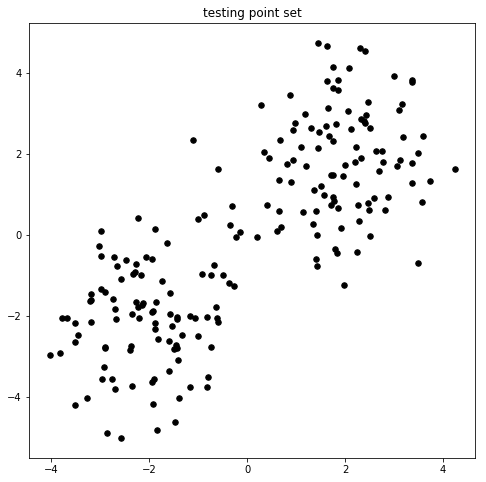

In [219]:
## Generating testing set
N_train = 100
r_plus = np.random.multivariate_normal(r_A, cov, N_train)
y_plus = np.array([1]*N_train)
r_minus = np.random.multivariate_normal(r_B, cov, N_train)
y_minus = np.array([-1]*N_train)
test_x = np.concatenate([r_plus, r_minus])
test_y = np.concatenate([y_plus, y_minus])
fig, axes = plt.subplots(1, 1, figsize = (8, 8))
axes.scatter(test_x[:, 0], test_x[:, 1], marker='o', color="black", s=30)
axes.set_title('testing point set')

###### Weights are initialized to be zeroes

1200 1200


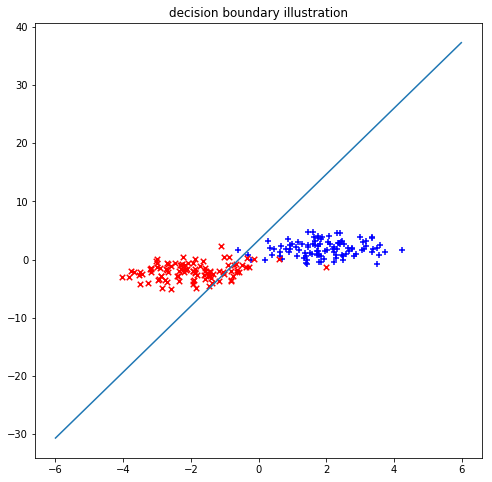

In [220]:
weights = np.array([-10.0, -17.0, 3.0])
## Show the initial decision boundary
fig, axes = plt.subplots(1, 1, figsize = (8, 8))
axes.scatter(r_plus[:, 0], r_plus[:, 1], marker='+', color="blue", s=30)
axes.scatter(r_minus[:, 0], r_minus[:, 1], marker='x', color="red", s=30)
x = np.arange(-6., 6., 0.01)
y = (-weights[0] - weights[1]*x)/weights[2]
print len(x), len(y)
bdry = axes.plot(x, y)
axes.set_title('decision boundary illustration')

Prediction: `f(x, y) = weights[0] + x*weights[1] + y*weights[2]`

In [221]:
def _get_pred(r):
    return weights[0] + weights[1]*r[0] + weights[2]*r[1]
def _get_delta_w0(r):
    f = _get_pred(r)
    if f*r[2] >= 1.:
        return 0.
    else:
        return -r[3]*r[2]

In [222]:
def _get_accu(r):
    f = _get_pred(r)
    if f*r[2] >= 1.:
        return 1.
    else:
        return 0.

In [223]:
%%time 
learning_rate = 0.1
N_epoch = 200
for epoch in range(1, N_epoch+1):
    pool = Pool(4)
    grad_w0 = np.sum(pool.map(_get_delta_w0, [(x, y, z, 1.) for (x,y),z in zip(train_x, train_y)]))
    grad_w1 = np.sum(pool.map(_get_delta_w0, [(x, y, z, x) for (x,y),z in zip(train_x, train_y)]))
    grad_w2 = np.sum(pool.map(_get_delta_w0, [(x, y, z, y) for (x,y),z in zip(train_x, train_y)]))
    pool.close()
    pool.join()
    lamb = 1./epoch
    weights[0] -= learning_rate*(grad_w0/N_train + lamb * weights[0])
    weights[1] -= learning_rate*(grad_w1/N_train + lamb * weights[1])
    weights[2] -= learning_rate*(grad_w2/N_train + lamb * weights[2])
    pool = Pool(4)
    print "epoch: ", epoch, "; accu: ", np.array(pool.map(_get_accu, [(x, y, z) for (x,y),z in zip(train_x, train_y)])).mean(),
    print "; val_accu: ", np.array(pool.map(_get_accu, [(x, y, z) for (x,y),z in zip(test_x, test_y)])).mean()
    pool.close()
    pool.join()

epoch:  1 ; accu:  0.15 ; val_accu:  0.165
epoch:  2 ; accu:  0.268 ; val_accu:  0.245
epoch:  3 ; accu:  0.392 ; val_accu:  0.385
epoch:  4 ; accu:  0.503 ; val_accu:  0.49
epoch:  5 ; accu:  0.601 ; val_accu:  0.61
epoch:  6 ; accu:  0.68 ; val_accu:  0.67
epoch:  7 ; accu:  0.725 ; val_accu:  0.705
epoch:  8 ; accu:  0.769 ; val_accu:  0.74
epoch:  9 ; accu:  0.796 ; val_accu:  0.77
epoch:  10 ; accu:  0.818 ; val_accu:  0.795
epoch:  11 ; accu:  0.839 ; val_accu:  0.805
epoch:  12 ; accu:  0.854 ; val_accu:  0.815
epoch:  13 ; accu:  0.873 ; val_accu:  0.83
epoch:  14 ; accu:  0.881 ; val_accu:  0.84
epoch:  15 ; accu:  0.892 ; val_accu:  0.85
epoch:  16 ; accu:  0.9 ; val_accu:  0.865
epoch:  17 ; accu:  0.906 ; val_accu:  0.875
epoch:  18 ; accu:  0.909 ; val_accu:  0.885
epoch:  19 ; accu:  0.913 ; val_accu:  0.895
epoch:  20 ; accu:  0.92 ; val_accu:  0.905
epoch:  21 ; accu:  0.926 ; val_accu:  0.905
epoch:  22 ; accu:  0.929 ; val_accu:  0.91
epoch:  23 ; accu:  0.933 ; val_a

epoch:  185 ; accu:  0.984 ; val_accu:  0.97
epoch:  186 ; accu:  0.984 ; val_accu:  0.97
epoch:  187 ; accu:  0.984 ; val_accu:  0.97
epoch:  188 ; accu:  0.984 ; val_accu:  0.97
epoch:  189 ; accu:  0.984 ; val_accu:  0.97
epoch:  190 ; accu:  0.984 ; val_accu:  0.97
epoch:  191 ; accu:  0.985 ; val_accu:  0.97
epoch:  192 ; accu:  0.985 ; val_accu:  0.97
epoch:  193 ; accu:  0.985 ; val_accu:  0.97
epoch:  194 ; accu:  0.985 ; val_accu:  0.97
epoch:  195 ; accu:  0.985 ; val_accu:  0.97
epoch:  196 ; accu:  0.985 ; val_accu:  0.97
epoch:  197 ; accu:  0.985 ; val_accu:  0.97
epoch:  198 ; accu:  0.985 ; val_accu:  0.97
epoch:  199 ; accu:  0.986 ; val_accu:  0.97
epoch:  200 ; accu:  0.986 ; val_accu:  0.97
CPU times: user 29.3 s, sys: 19.9 s, total: 49.3 s
Wall time: 1min 12s


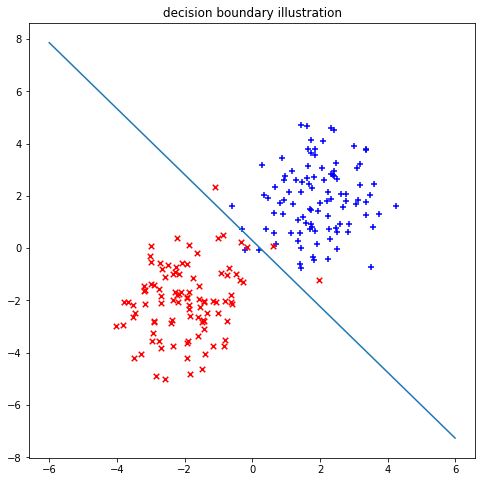

In [224]:
## Show decision boundary
fig, axes = plt.subplots(1, 1, figsize = (8, 8))
axes.scatter(r_plus[:, 0], r_plus[:, 1], marker='+', color="blue", s=30)
axes.scatter(r_minus[:, 0], r_minus[:, 1], marker='x', color="red", s=30)
x = np.arange(-6., 6., 0.01)
y = (-weights[0] - weights[1]*x)/weights[2]
bdry = axes.plot(x, y)
axes.set_title('decision boundary illustration')